Cribbed from https://examples.dask.org/machine-learning.html

In [1]:
%matplotlib inline

In [4]:
from dask.distributed import Client
import dask_ml.datasets
import dask_ml.cluster
import matplotlib.pyplot as plt

In [5]:
client = Client()
client

/home/jkarpel/.python/envs/htcondor-dask/lib/python3.8/site-packages/distributed/node.py:151: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 37247 instead
  warnings.warn(


Client Scheduler: tcp://127.0.0.1:46033 Dashboard: http://127.0.0.1:37247/status,Cluster Workers: 4 Cores: 16 Memory: 33.50 GB


distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker


In [ ]:
from dask.distributed import Client

client = Client("tcp://127.0.0.1:46097")
client

In [5]:
X, y = dask_ml.datasets.make_blobs(n_samples=10_000_000,
                                   chunks=1_000_000,
                                   centers=5,
                                   center_box = (-10, 10),
                                   random_state=11)
X = X.persist()
X

dask.array<concatenate, shape=(10000000, 2), dtype=float64, chunksize=(1000000, 2), chunktype=numpy.ndarray>

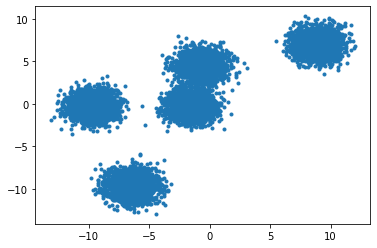

In [6]:
DENSITY = 1000

fig, ax = plt.subplots()
ax.scatter(X[::DENSITY, 0], X[::DENSITY, 1], 
           marker='.');

In [7]:
km = dask_ml.cluster.KMeans(n_clusters=5, init_max_iter=2, oversampling_factor=10)
km.fit(X)

KMeans(algorithm='full', copy_x=True, init='k-means||', init_max_iter=2,
       max_iter=300, n_clusters=5, n_jobs=1, oversampling_factor=10,
       precompute_distances='auto', random_state=None, tol=0.0001)

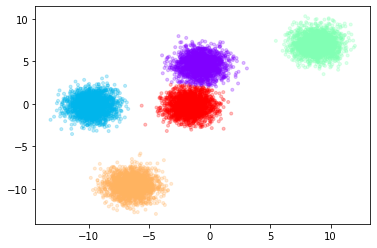

In [65]:
fig, ax = plt.subplots()
ax.scatter(X[::DENSITY, 0], X[::DENSITY, 1], 
           marker='.', 
           c=km.labels_[::DENSITY],
           cmap='rainbow', alpha=0.25);